<a href="https://colab.research.google.com/github/Susena-V/SNA_Project/blob/main/Barabasi_Albert_Model_Generating_a_Scale_Free_Network_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A) Generate BA Network:
1. Implement the BA Algorithm to generate the scale-free network S over 10000 nodes. Assume
there are 100 nodes in the initialization phase for BA and adhering to the characteristics laid
by the BA Model (deg of each node >=1). State clearly what are the initialisation steps in the
report.
2. Find the Giant component for S and compare the Giant component size with the two networks
that you had taken in the Round 1. Compare and contrast the basic statistics of the networks
(mean degree, degree distribution, average local clustering coefficient, global clustering
coefficient).
3. Do all the centrality measure studies conducted for Project Round 1 for the net

In [2]:
import numpy as np
import networkx as nx

In [2]:
N = 10000
m0 = 100
m = 80 # edges added per new node - mention in the report

G = nx.complete_graph(m0)

for new_node in range(m0, N):
  degrees = [G.degree(node) for node in G.nodes()]

  total_degree = sum(degrees)
  probabilities = [degree/total_degree for degree in degrees]

  targets = np.random.choice(G.nodes(), size = m, replace = False, p = probabilities)

  for target in targets:
    G.add_edge(new_node, target)

ba_network = G

In [3]:
with open('S.txt', 'w') as f:
  for u,v in ba_network.edges():
    f.write(f'{u} {v} \n')

EVERY NEW NODE ADDS 80 EDGES - THIS SHOULD GO IN THE INITIALIZATION REPORT

## Identifying the Giant Component

In [4]:
components = nx.connected_components(ba_network)
giant_component = max(components, key = len)

In [5]:
print(f'GIANT COMPONENT {len(giant_component)}')

GIANT COMPONENT 10000


basic statistics of the networks
(mean degree, degree distribution, average local clustering coefficient, global clustering
coefficient).

In [6]:
mean_degree = 2*len(ba_network.edges())/len(ba_network.nodes())
print(f"Mean Degree: {mean_degree}")

Mean Degree: 159.39


In [7]:
from collections import defaultdict

In [8]:
import matplotlib.pyplot as plt

degree_sequence = sorted([d for n, d in ba_network.degree()], reverse = True)
degree_counts = defaultdict(int)

for degree in degree_sequence:
  degree_counts[degree]+=1

degrees = list(degree_counts.keys())
frequencies = list(degree_counts.values())


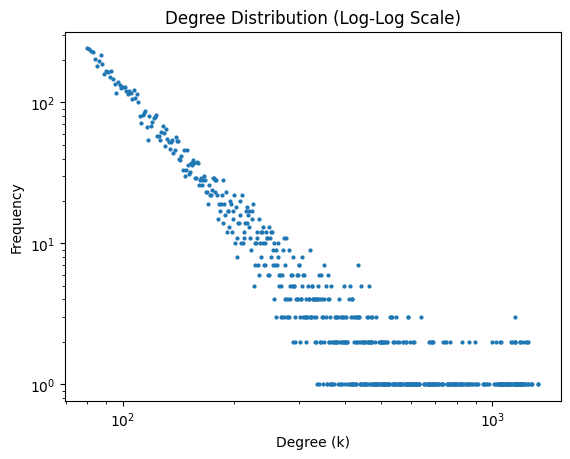

In [9]:
plt.loglog(degrees, frequencies, 'o', markersize=2)
plt.xlabel("Degree (k)")
plt.ylabel("Frequency")
plt.title("Degree Distribution (Log-Log Scale)")
plt.show()

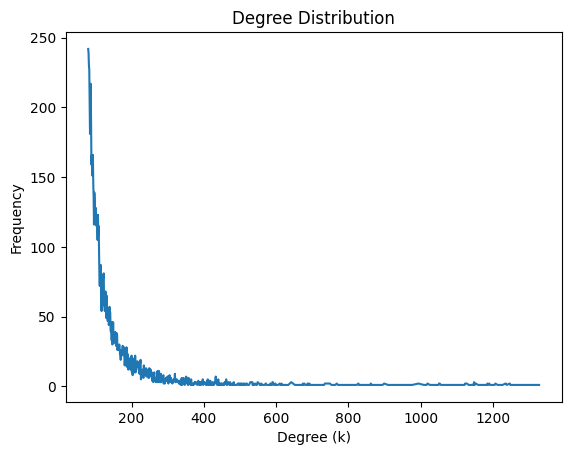

In [10]:
plt.plot(degrees, frequencies)
plt.xlabel("Degree (k)")
plt.ylabel("Frequency")
plt.title("Degree Distribution")
plt.show()

In [11]:
# Compute the average local clustering coefficient
avg_local_clustering = nx.average_clustering(ba_network)
print(f"Average Local Clustering Coefficient: {avg_local_clustering}")

Average Local Clustering Coefficient: 0.053567509858286316


In [12]:
# Compute the global clustering coefficient
global_clustering = nx.transitivity(ba_network)
print(f"Global Clustering Coefficient: {global_clustering}")

Global Clustering Coefficient: 0.05520148523989778


## Centrality Measures

In [3]:
import networkx as nx



G = nx.Graph()  # Undirected graph

# Open the file and read edges
with open("/content/S.txt", 'r') as f:
    for line in f:
        line = line.strip()  # Remove leading/trailing whitespace
        if line:  # Skip empty lines
            u, v = map(int, line.split())  # Split the line into two nodes
            G.add_edge(u, v)  # Add the edge to the graph


# Print basic information about the graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 10000
Number of edges: 796950


In [5]:
ba_network = G

In [6]:
degree_centrality = nx.degree_centrality(ba_network)

top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by Degree Centrality:", top_degree)

Top 5 nodes by Degree Centrality: [(72, 0.1328132813281328), (80, 0.13251325132513253), (93, 0.1277127712771277), (59, 0.1272127212721272), (33, 0.127012701270127)]


In [14]:
eigenvector_centrality = nx.eigenvector_centrality(ba_network, max_iter=1000)

top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by Eigenvector Centrality:", top_eigenvector)

Top 5 nodes by Eigenvector Centrality: [(72, 0.06196125227543433), (80, 0.06123977041748353), (93, 0.06101351622893872), (12, 0.05907399063921787), (33, 0.059045178820994235)]


In [8]:
# Compute Katz centrality
katz_centrality = nx.katz_centrality(G, alpha=0.001, max_iter =5000)

# Print top 5 nodes with highest Katz centrality
top_katz = sorted(katz_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by Katz Centrality:", top_katz)

Top 5 nodes by Katz Centrality: [(72, 0.02323454179894621), (80, 0.023154473427610213), (93, 0.022747908412119287), (33, 0.022557135885368403), (59, 0.022518383861057232)]


In [9]:
# Compute PageRank centrality
pagerank_centrality = nx.pagerank(G, alpha=0.85)

# Print top 5 nodes with highest PageRank centrality
top_pagerank = sorted(pagerank_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by PageRank Centrality:", top_pagerank)

Top 5 nodes by PageRank Centrality: [(72, 0.0007219869026641566), (80, 0.0007202564185246818), (59, 0.00069327483626921), (93, 0.0006916914970152581), (33, 0.0006896989928914834)]


In [10]:
# Compute local clustering coefficients for all nodes
local_clustering = nx.clustering(G)

# Print top 5 nodes with highest local clustering
top_local_clustering = sorted(local_clustering.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by Local Clustering Coefficient:", top_local_clustering)

Top 5 nodes by Local Clustering Coefficient: [(9112, 0.11548633558624744), (9889, 0.1111111111111111), (6908, 0.10827374872318693), (9411, 0.10478771454381211), (9857, 0.10154320987654321)]


In [11]:
# Compute global clustering coefficient
global_clustering = nx.transitivity(G)
print(f"Global Clustering Coefficient: {global_clustering}")

Global Clustering Coefficient: 0.05520148523989778


In [12]:
# Compute average local clustering coefficient
avg_local_clustering = sum(local_clustering.values()) / len(local_clustering)
print(f"Average Local Clustering Coefficient: {avg_local_clustering}")

# Compare
print(f"Comparison: Average Local Clustering ({avg_local_clustering}) vs. Global Clustering ({global_clustering})")

Average Local Clustering Coefficient: 0.053567509858286004
Comparison: Average Local Clustering (0.053567509858286004) vs. Global Clustering (0.05520148523989778)


In [13]:
# Compute betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Print top 5 nodes with highest betweenness centrality
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by Betweenness Centrality:", top_betweenness)

Top 5 nodes by Betweenness Centrality: [(72, 0.003998722400576799), (80, 0.003949353056385265), (59, 0.003720508046444365), (30, 0.003664284597554697), (4, 0.0036277795355501036)]


In [14]:
# Compute closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Print top 5 nodes with highest closeness centrality
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by Closeness Centrality:", top_closeness)

Top 5 nodes by Closeness Centrality: [(72, 0.5355650776647027), (80, 0.5354790338992128), (93, 0.5341060840767053), (59, 0.5339634732457545), (33, 0.5339064502349423)]
